# XAI Capstone Project on the [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank%2Bmarketing)

The task is to predict whether a client will subscribe to a term deposit after a direct marketing campaign.

This is a binary classification problem where:

Target Variable: y
Positive Outcome ('yes'): The client subscribed to the term deposit.
Negative Outcome ('no'): The client did not subscribe to the term deposit.



# 1. Exploratory Data Analysis (EDA)

## 1.1. Setup

First, let's import the necessary libraries for data manipulation and visualization and load the dataset.

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fontTools.misc.symfont import printGreenPen

## 1.2. Initial Data Inspection

Let's get a first look at the data's structure, content, and statistical summary. For that define the paths:

In [320]:
BANK_PATH = "data/bank/bank.csv"
BANK_FULL_PATH = "data/bank/bank-full.csv"
BANK_ADDITIONAL_PATH = "data/bank-additional/bank-additional.csv"
BANK_ADDITIONAL_FULL_PATH = "data/bank-additional/bank-additional-full.csv"

In [321]:
bank_df = pd.read_csv(BANK_PATH, sep=";")
bank_full_df = pd.read_csv(BANK_FULL_PATH,sep=";")
bank_additional_df = pd.read_csv(BANK_ADDITIONAL_PATH,sep=";")
bank_additional_full_df = pd.read_csv(BANK_ADDITIONAL_FULL_PATH,sep=";")

In [322]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [323]:
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [324]:
bank_additional_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [325]:
bank_additional_full_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [326]:
df_list = [bank_df, bank_full_df, bank_additional_df, bank_additional_full_df]
print(f"The bank-full.csv dataset has the shape of: {bank_full_df.shape}")
print(f"It contains the columns: {list(bank_full_df.columns)}\n")
print("----------------------------------------")
print(f"The bank.csv has the shape of: {bank_df.shape}")
print(f"It contains the columns: {list(bank_df.columns)}\n")
print("----------------------------------------")
print(f"The bank-additional-full.csv dataset has the shape of: {bank_additional_full_df.shape}")
print(f"It contains the columns: {list(bank_additional_full_df.columns)}\n")
print("----------------------------------------")
print(f"The bank-additional.csv dataset has the shape of: {bank_additional_df.shape}")
print(f"It contains the columns: {list(bank_additional_df.columns)}\n")

The bank-full.csv dataset has the shape of: (45211, 17)
It contains the columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

----------------------------------------
The bank.csv has the shape of: (4521, 17)
It contains the columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

----------------------------------------
The bank-additional-full.csv dataset has the shape of: (41188, 21)
It contains the columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

----------------------------------------
The bank-additional.csv dataset has the shape of: (

**Verification Conclusion:** The shapes match the documentation, and the smaller files are confirmed to be true subsets of the larger files. We can now confidently proceed with `bank-additional-full.csv` for our analysis.

In [327]:
# get full statistical metrics on numerical columns
bank_additional_full_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 1.3. Data Cleaning

We'll check for any missing values and duplicates. For that we will need to see what column entries exists for each column in the first place.

In [328]:
# Loop through each column in the dataframe
for column in bank_additional_full_df.columns:
    num_unique_values = bank_additional_full_df[column].nunique()

    print(f"\n----- Column: '{column}' -----")
    print(f"Number of unique values: {num_unique_values}")

    # Set a threshold to decide whether to print all unique values
    # This avoids printing thousands of unique values for continuous columns like 'age' or 'duration'
    if num_unique_values < 15:
        # Sort the values to make them easier to read
        unique_values = sorted(bank_additional_full_df[column].unique())
        print(f"Unique values: {unique_values}")
    else:
        # For columns with many unique values, we just note that it's a high-cardinality feature
        # We can show a small sample of the unique values
        sample_unique_values = list(bank_additional_full_df[column].unique())[:5]
        print(f"Values: [High Cardinality Feature - Sample: {sample_unique_values}...]")


----- Column: 'age' -----
Number of unique values: 78
Values: [High Cardinality Feature - Sample: [np.int64(56), np.int64(57), np.int64(37), np.int64(40), np.int64(45)]...]

----- Column: 'job' -----
Number of unique values: 12
Unique values: ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']

----- Column: 'marital' -----
Number of unique values: 4
Unique values: ['divorced', 'married', 'single', 'unknown']

----- Column: 'education' -----
Number of unique values: 8
Unique values: ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

----- Column: 'default' -----
Number of unique values: 3
Unique values: ['no', 'unknown', 'yes']

----- Column: 'housing' -----
Number of unique values: 3
Unique values: ['no', 'unknown', 'yes']

----- Column: 'loan' -----
Number of unique values: 3
Unique values: ['no', 'unknown',

## 1.4. Feature Analysis

Now we'll analyze how each feature relates to the subscription outcome `y`. This will help us identify potentially predictive features.

(array([36548.,  4640.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

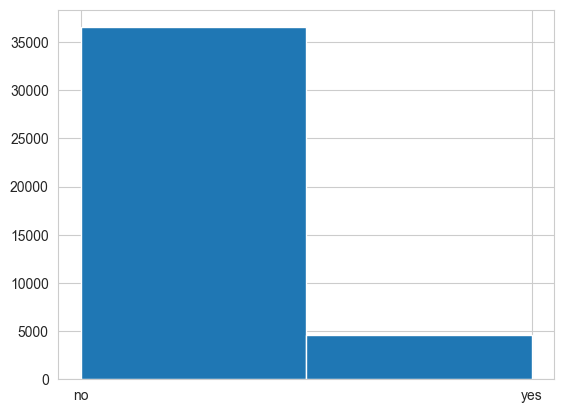

In [377]:
# plot y distribution
plt.hist(bank_additional_full_df["y"], bins=2)

### 1.4.1 Categorical Features vs. Target ('y')

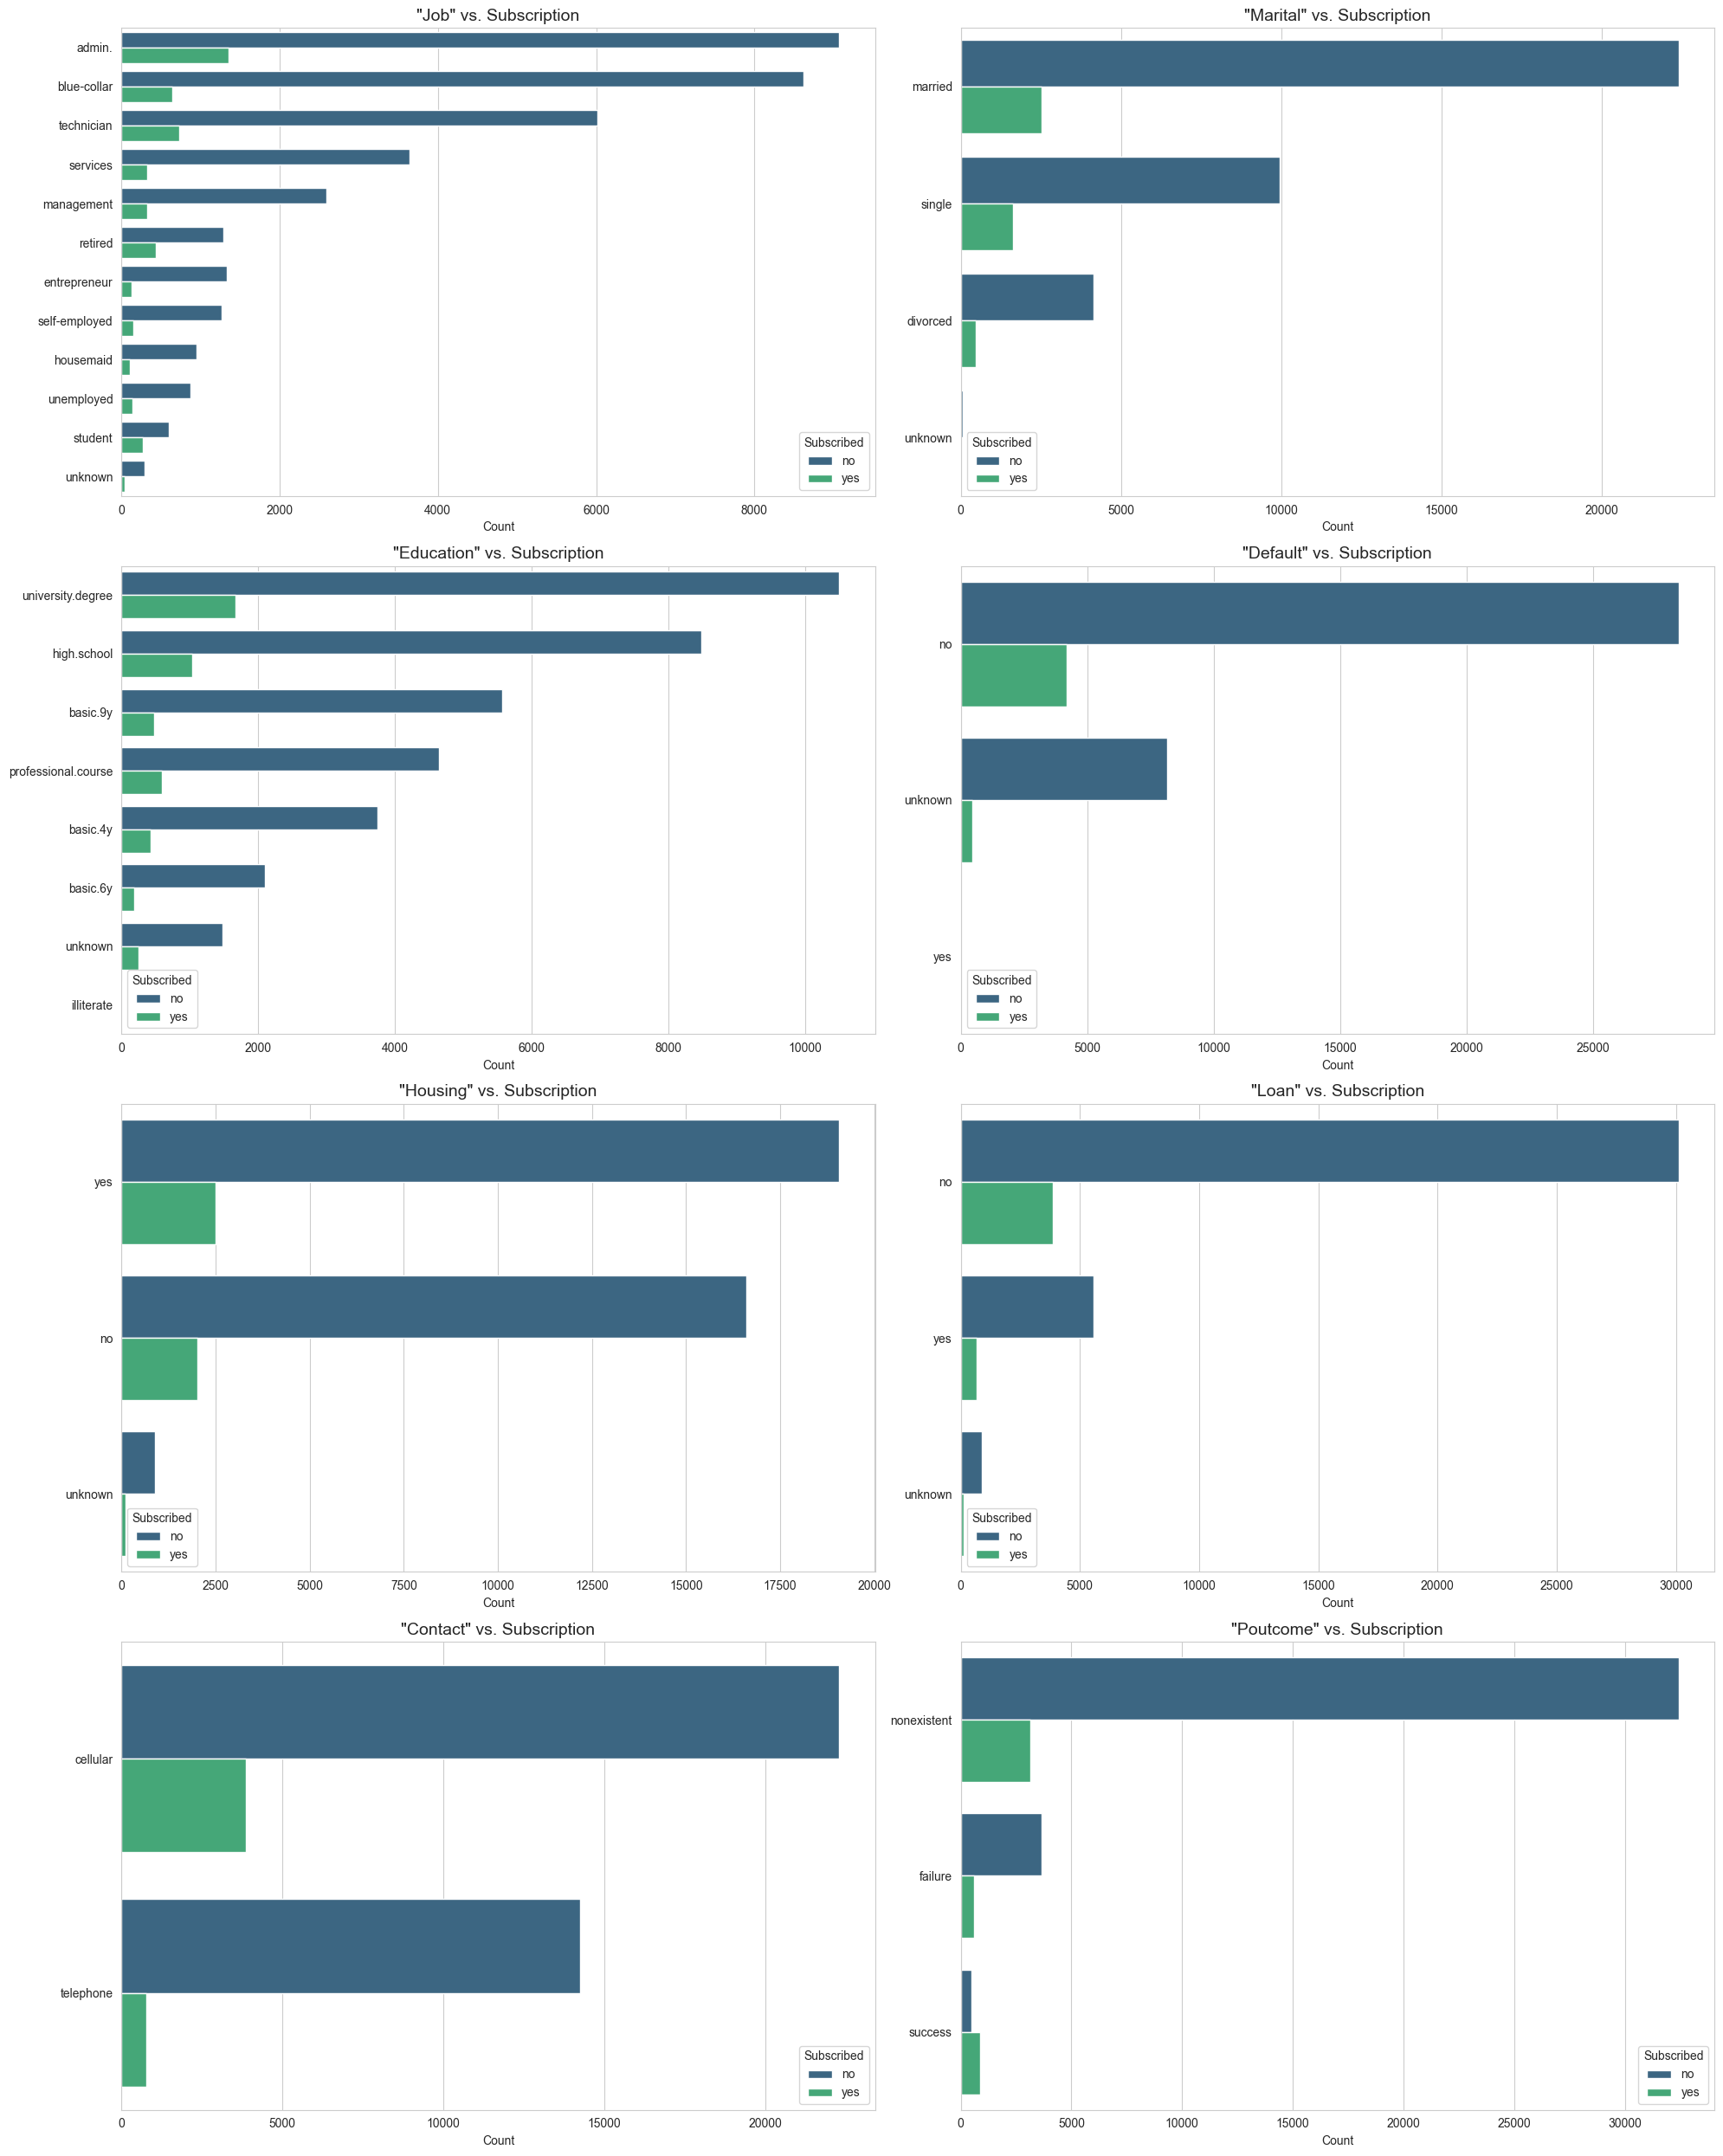

In [329]:
# List of key categorical features to analyze
cat_features_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Create plots
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(cat_features_to_plot):
    # Use hue to show the distribution of the target variable for each category
    sns.countplot(y=col, data=bank_additional_full_df, ax=axes[i], order=bank_additional_full_df[col].value_counts().index, hue='y', palette='viridis')
    axes[i].set_title(f'"{col.capitalize()}" vs. Subscription', fontsize=14)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')
    axes[i].legend(title='Subscribed')

plt.tight_layout()
plt.show()

### 1.4.2 Numerical Features vs. Target ('y')

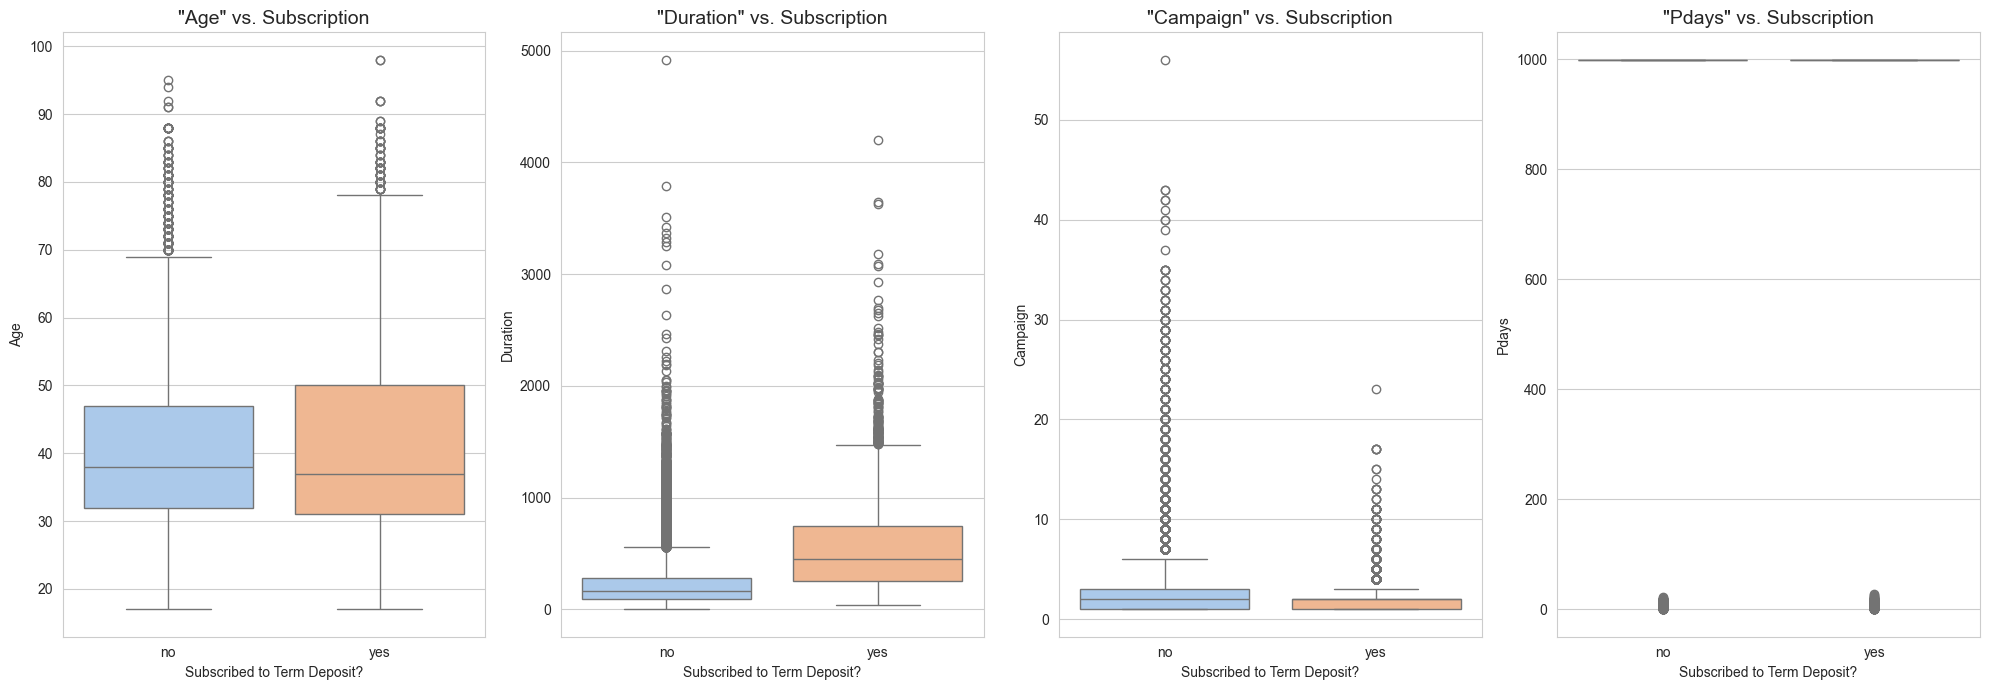

In [379]:
# List of key numerical features to analyze
num_features_to_plot = ['age', 'duration', 'campaign','pdays']

# Create boxplots
fig, axes = plt.subplots(1, 4, figsize=(20, 7))

for i, col in enumerate(num_features_to_plot):
    sns.boxplot(x='y', y=col, data=bank_additional_full_df, ax=axes[i],hue="y", palette='pastel', legend=False)
    axes[i].set_title(f'"{col.capitalize()}" vs. Subscription', fontsize=14)
    axes[i].set_xlabel('Subscribed to Term Deposit?')
    axes[i].set_ylabel(col.capitalize())

plt.tight_layout()
plt.show()

### 1.4.3 Time & Previous Campaign Features vs. Target ('y')

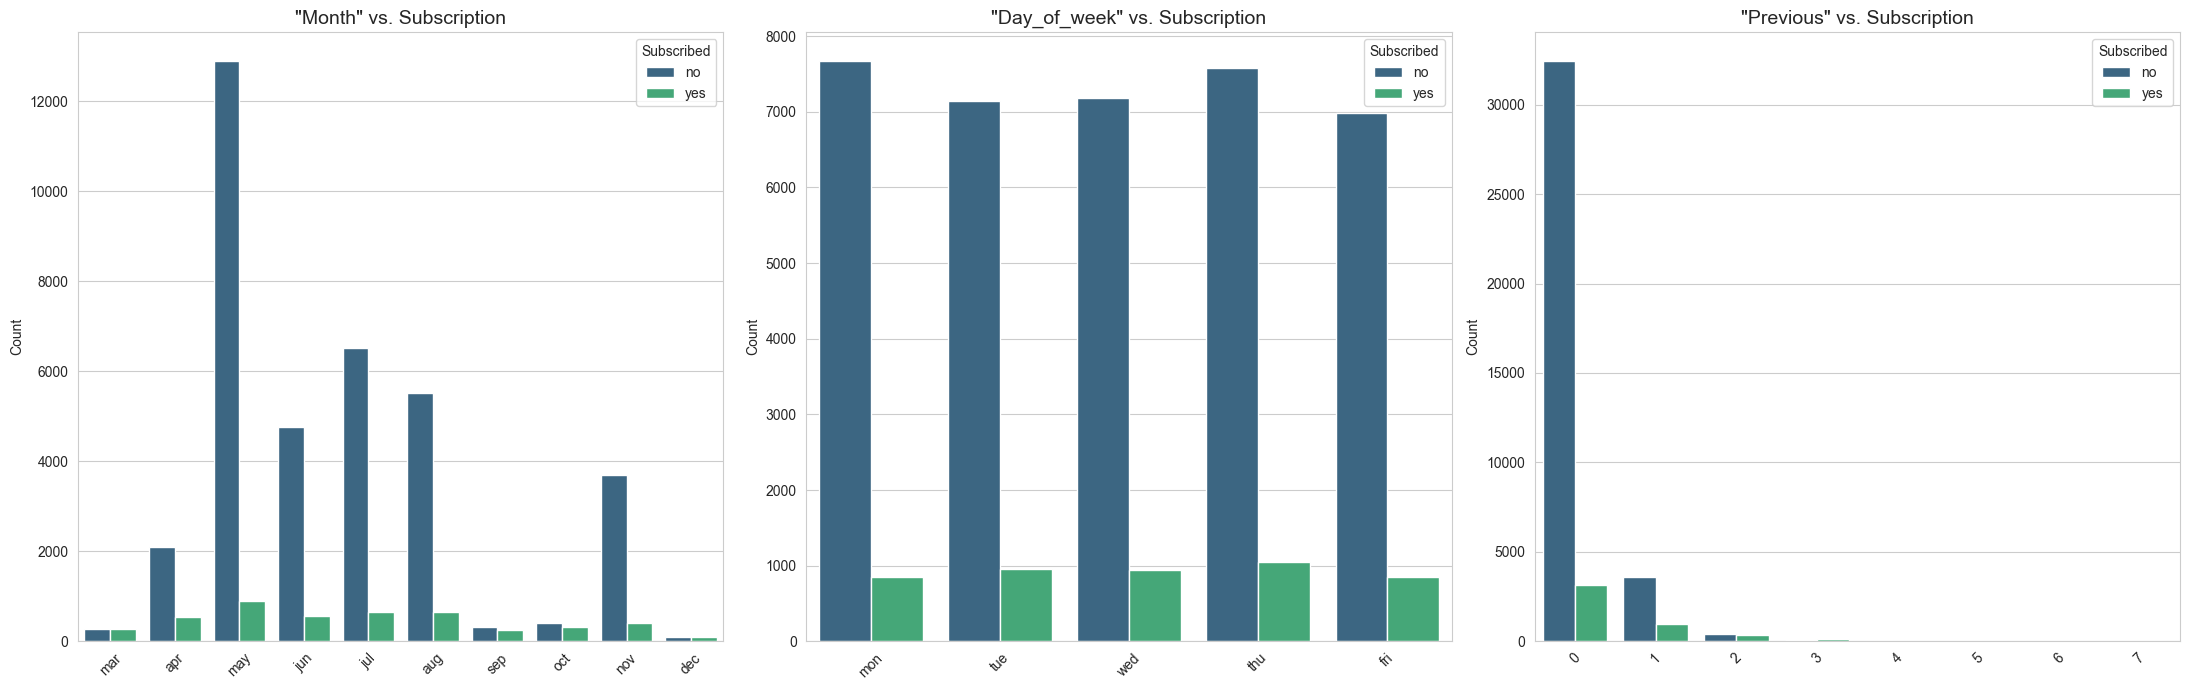

In [331]:
# Features to analyze
features_to_plot = ['month', 'day_of_week', 'previous']

# Define a chronological order for months and days
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
order_map = {'month': month_order, 'day_of_week': day_order, 'previous': sorted(bank_additional_full_df['previous'].unique())}


fig, axes = plt.subplots(1, 3, figsize=(22, 7))
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    sns.countplot(x=col, data=bank_additional_full_df, ax=axes[i], order=order_map[col], hue='y', palette='viridis')
    axes[i].set_title(f'"{col.capitalize()}" vs. Subscription', fontsize=14)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45) # Rotate labels for readability
    axes[i].legend(title='Subscribed')

plt.tight_layout()
plt.show()

### 1.4.4 Social & Economic Features vs. Target ('y')

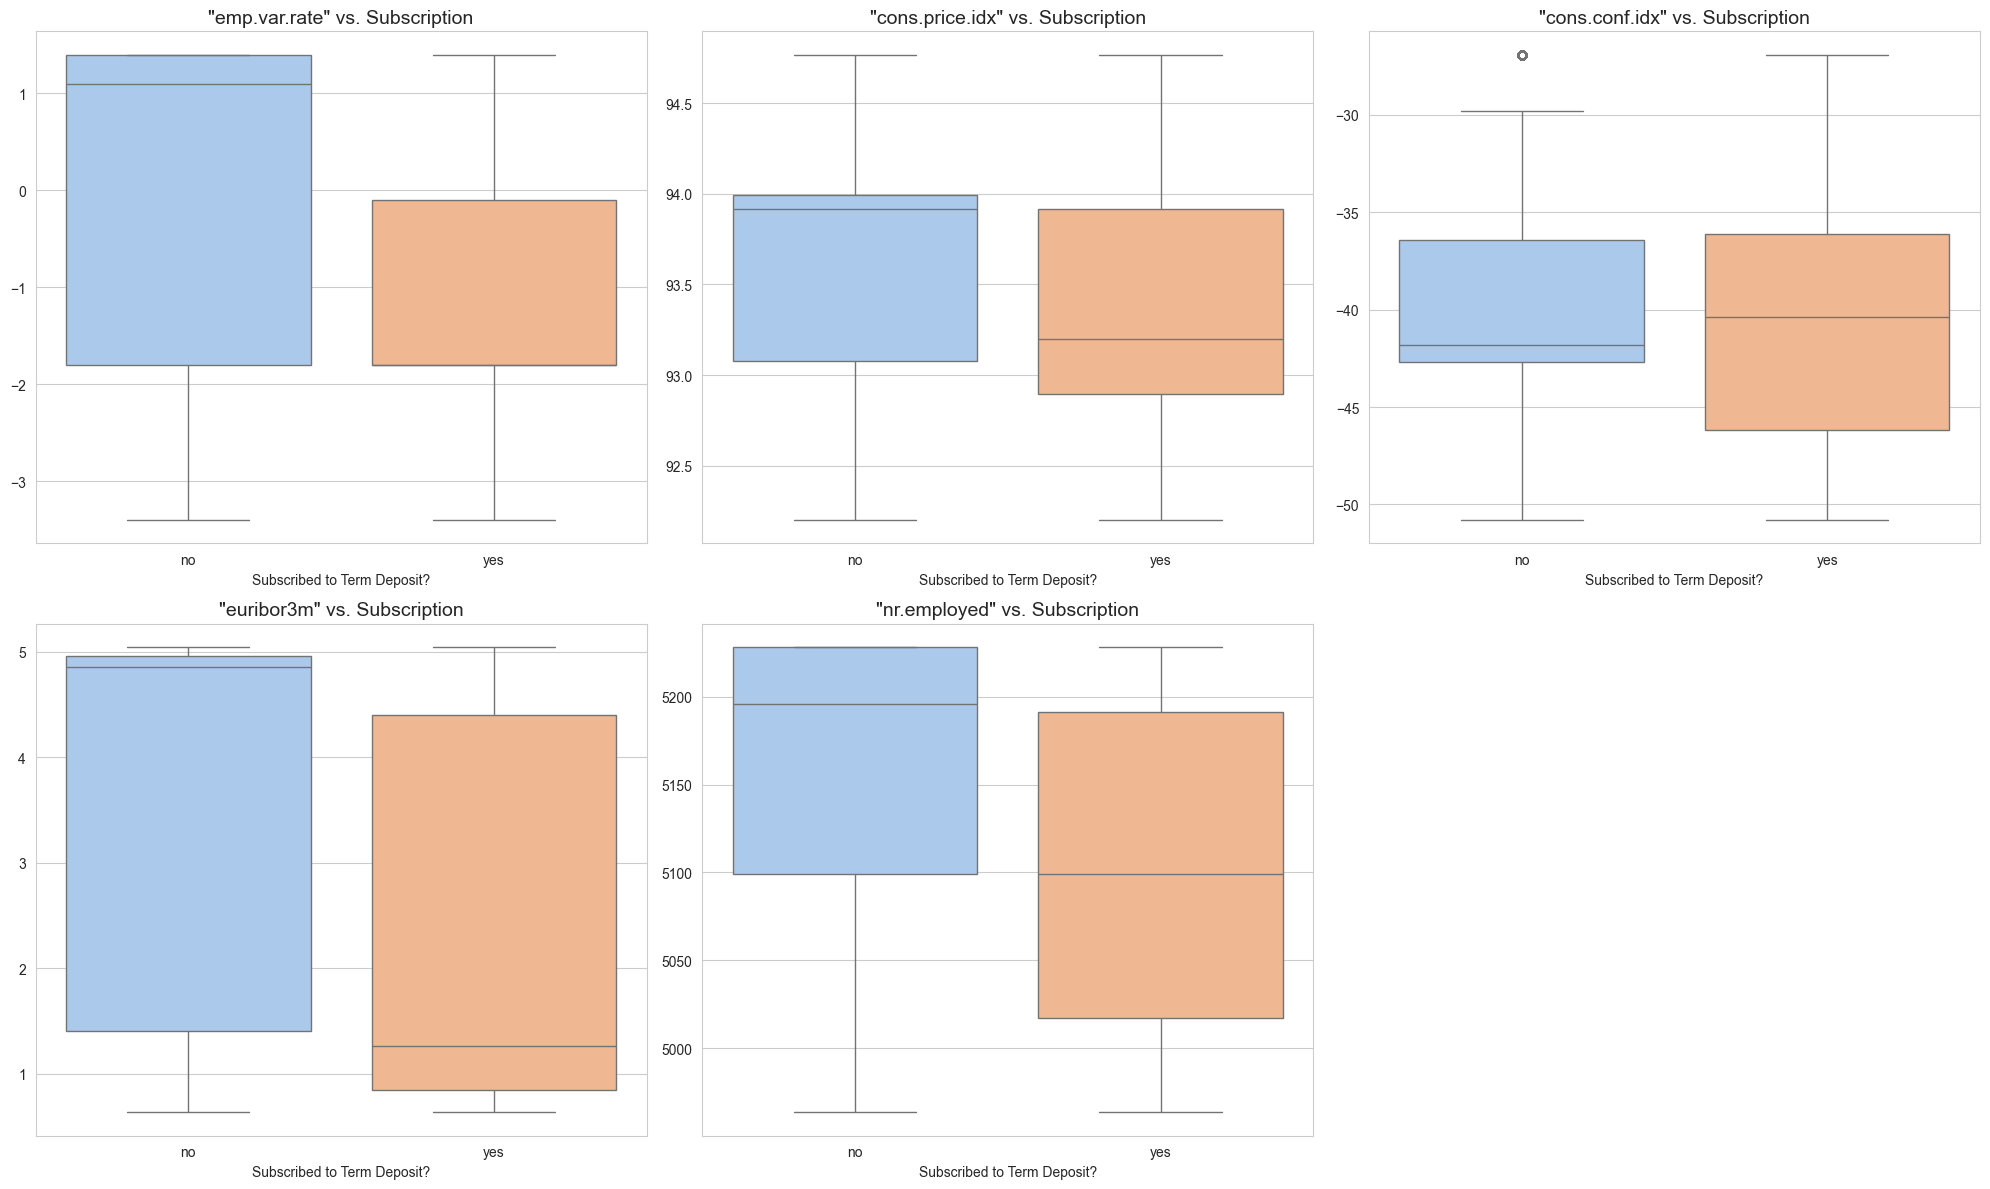

In [332]:
# List of social and economic features
social_econ_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create boxplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(social_econ_features):
    sns.boxplot(x='y', y=col, data=bank_additional_full_df, ax=axes[i], palette='pastel', hue='y', legend=False)
    axes[i].set_title(f'"{col}" vs. Subscription', fontsize=14)
    axes[i].set_xlabel('Subscribed to Term Deposit?')
    axes[i].set_ylabel('')
# Hide the empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

### 1.4.5 Visual Feature Analysis Summary

**A. Categorical Features vs. Target ('y')**

* **Job & Education**: Administrative staff, technicians, and blue-collar workers form the largest groups of clients contacted. However, students and retired individuals show a proportionally higher subscription rate ("yes") compared to other job categories. Clients with a university degree were contacted most frequently, but subscription rates appear relatively consistent across different education levels, with a slight increase for those with higher education.
* **Marital & Default Status**: Married individuals are the largest client segment, followed by singles. The "Default" status is overwhelmingly "no," and very few clients with a "yes" status subscribed. This suggests that clients with a history of credit default are unlikely to subscribe.
* **Housing & Loan**: The subscription rate is higher for clients who do not have an existing housing loan. Similarly, clients without a personal loan are more likely to subscribe than those with one.
* **Contact & Previous Campaign Outcome (Poutcome)**: Contacting clients via "cellular" is associated with a much higher subscription rate than "telephone". As expected, a "success" outcome from a previous campaign is a strong predictor of a "yes" for the current campaign.

**B. Numerical Features vs. Target ('y')**

* **Age**: The age distribution for both subscribers and non-subscribers is similar, with the median age for subscribers appearing slightly higher than for non-subscribers.
* **Duration**: The duration of the last contact is significantly higher for clients who subscribed. This is a key insight but must be handled with care, as call duration is not known until after the call is made. Thus, it cannot be used as a predictive feature for a pre-call model.
* **Campaign**: The number of contacts during the campaign is heavily skewed towards the lower end for both groups. However, the median number of contacts for subscribers is slightly lower than for non-subscribers, suggesting that fewer contacts are often more effective.

**C. Time & Previous Campaign Features vs. Target ('y')**

* **Month & Day of the Week**: Subscription rates vary significantly by month, with the highest success rates appearing in March, September, October, and December. The day of the week does not show a significant variation in subscription rates.
* **Previous**: A higher number of previous contacts (before the current campaign) is associated with a higher likelihood of subscribing, although the vast majority of clients had no previous contact.

**D. Social & Economic Features vs. Target ('y')**

* The boxplots for social and economic indicators show clear distinctions between subscribers and non-subscribers:
    * **Subscribers ("yes") are associated with**:
        * Lower (more negative) employment variation rates (`emp.var.rate`).
        * Lower consumer price indexes (`cons.price.idx`).
        * Higher (less negative) consumer confidence indexes (`cons.conf.idx`).
        * Lower 3-month Euribor rates (`euribor3m`).
        * Lower numbers of employees (`nr.employed`).
* These trends suggest that clients are more likely to subscribe during periods of lower economic pressure (e.g., lower interest rates, lower employment figures, and higher consumer confidence).

## 1.5 Quantifying Feature Relationships
The next logical step in the Exploratory Data Analysis (EDA) would be to quantify the relationships observed visually in the last section. The plots have shown a good intuition about the data, and the next step is to generate concrete numbers to support these findings before moving to preprocessing the data.

### 1.5.1 Correlation of numerical Columns
On how to interprete this correlation materix refer to this [website](https://www.quanthub.com/how-to-read-a-correlation-matrix/) which explains how to read a correlation matrix.

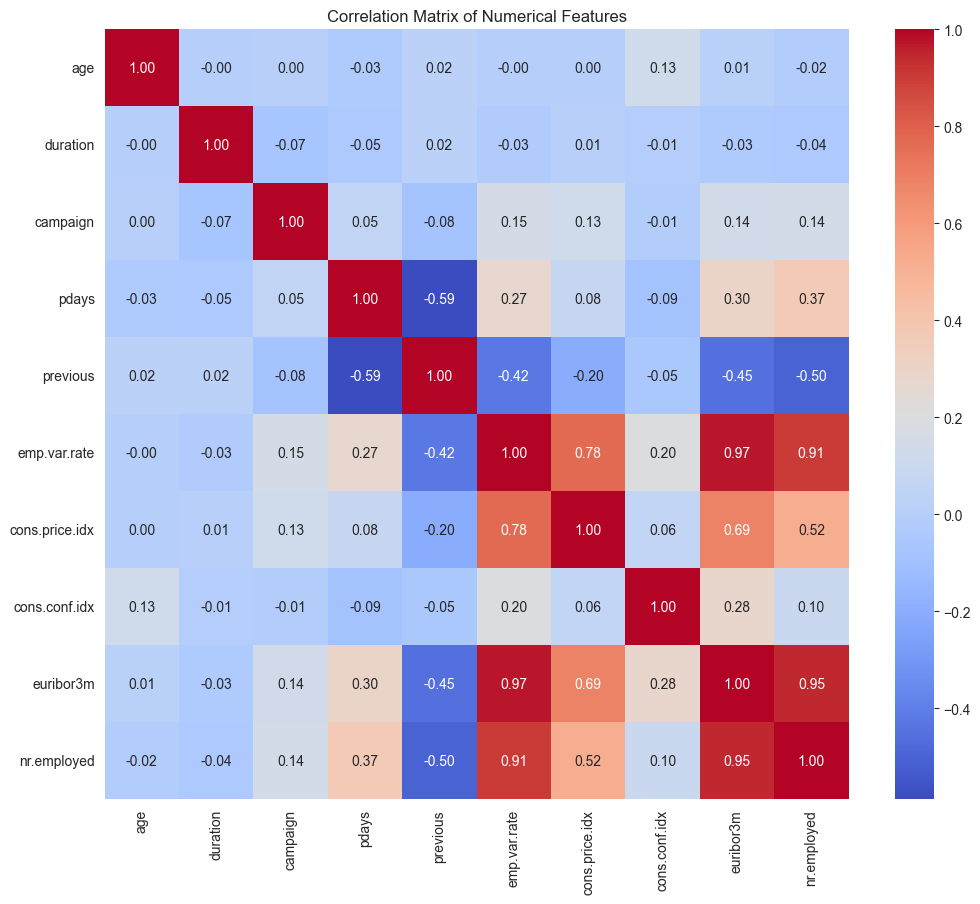

In [333]:
# Select only numerical columns for correlation
numerical_cols = bank_additional_full_df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = bank_additional_full_df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 1.5.2 Subscription Rate Analysis

In [334]:
# First, create a copy and convert 'y' to a numerical format 1: yes 0: no
df_rate = bank_additional_full_df.copy()
df_rate['y_numeric'] = df_rate['y'].apply(lambda x: 1 if x == 'yes' else 0)

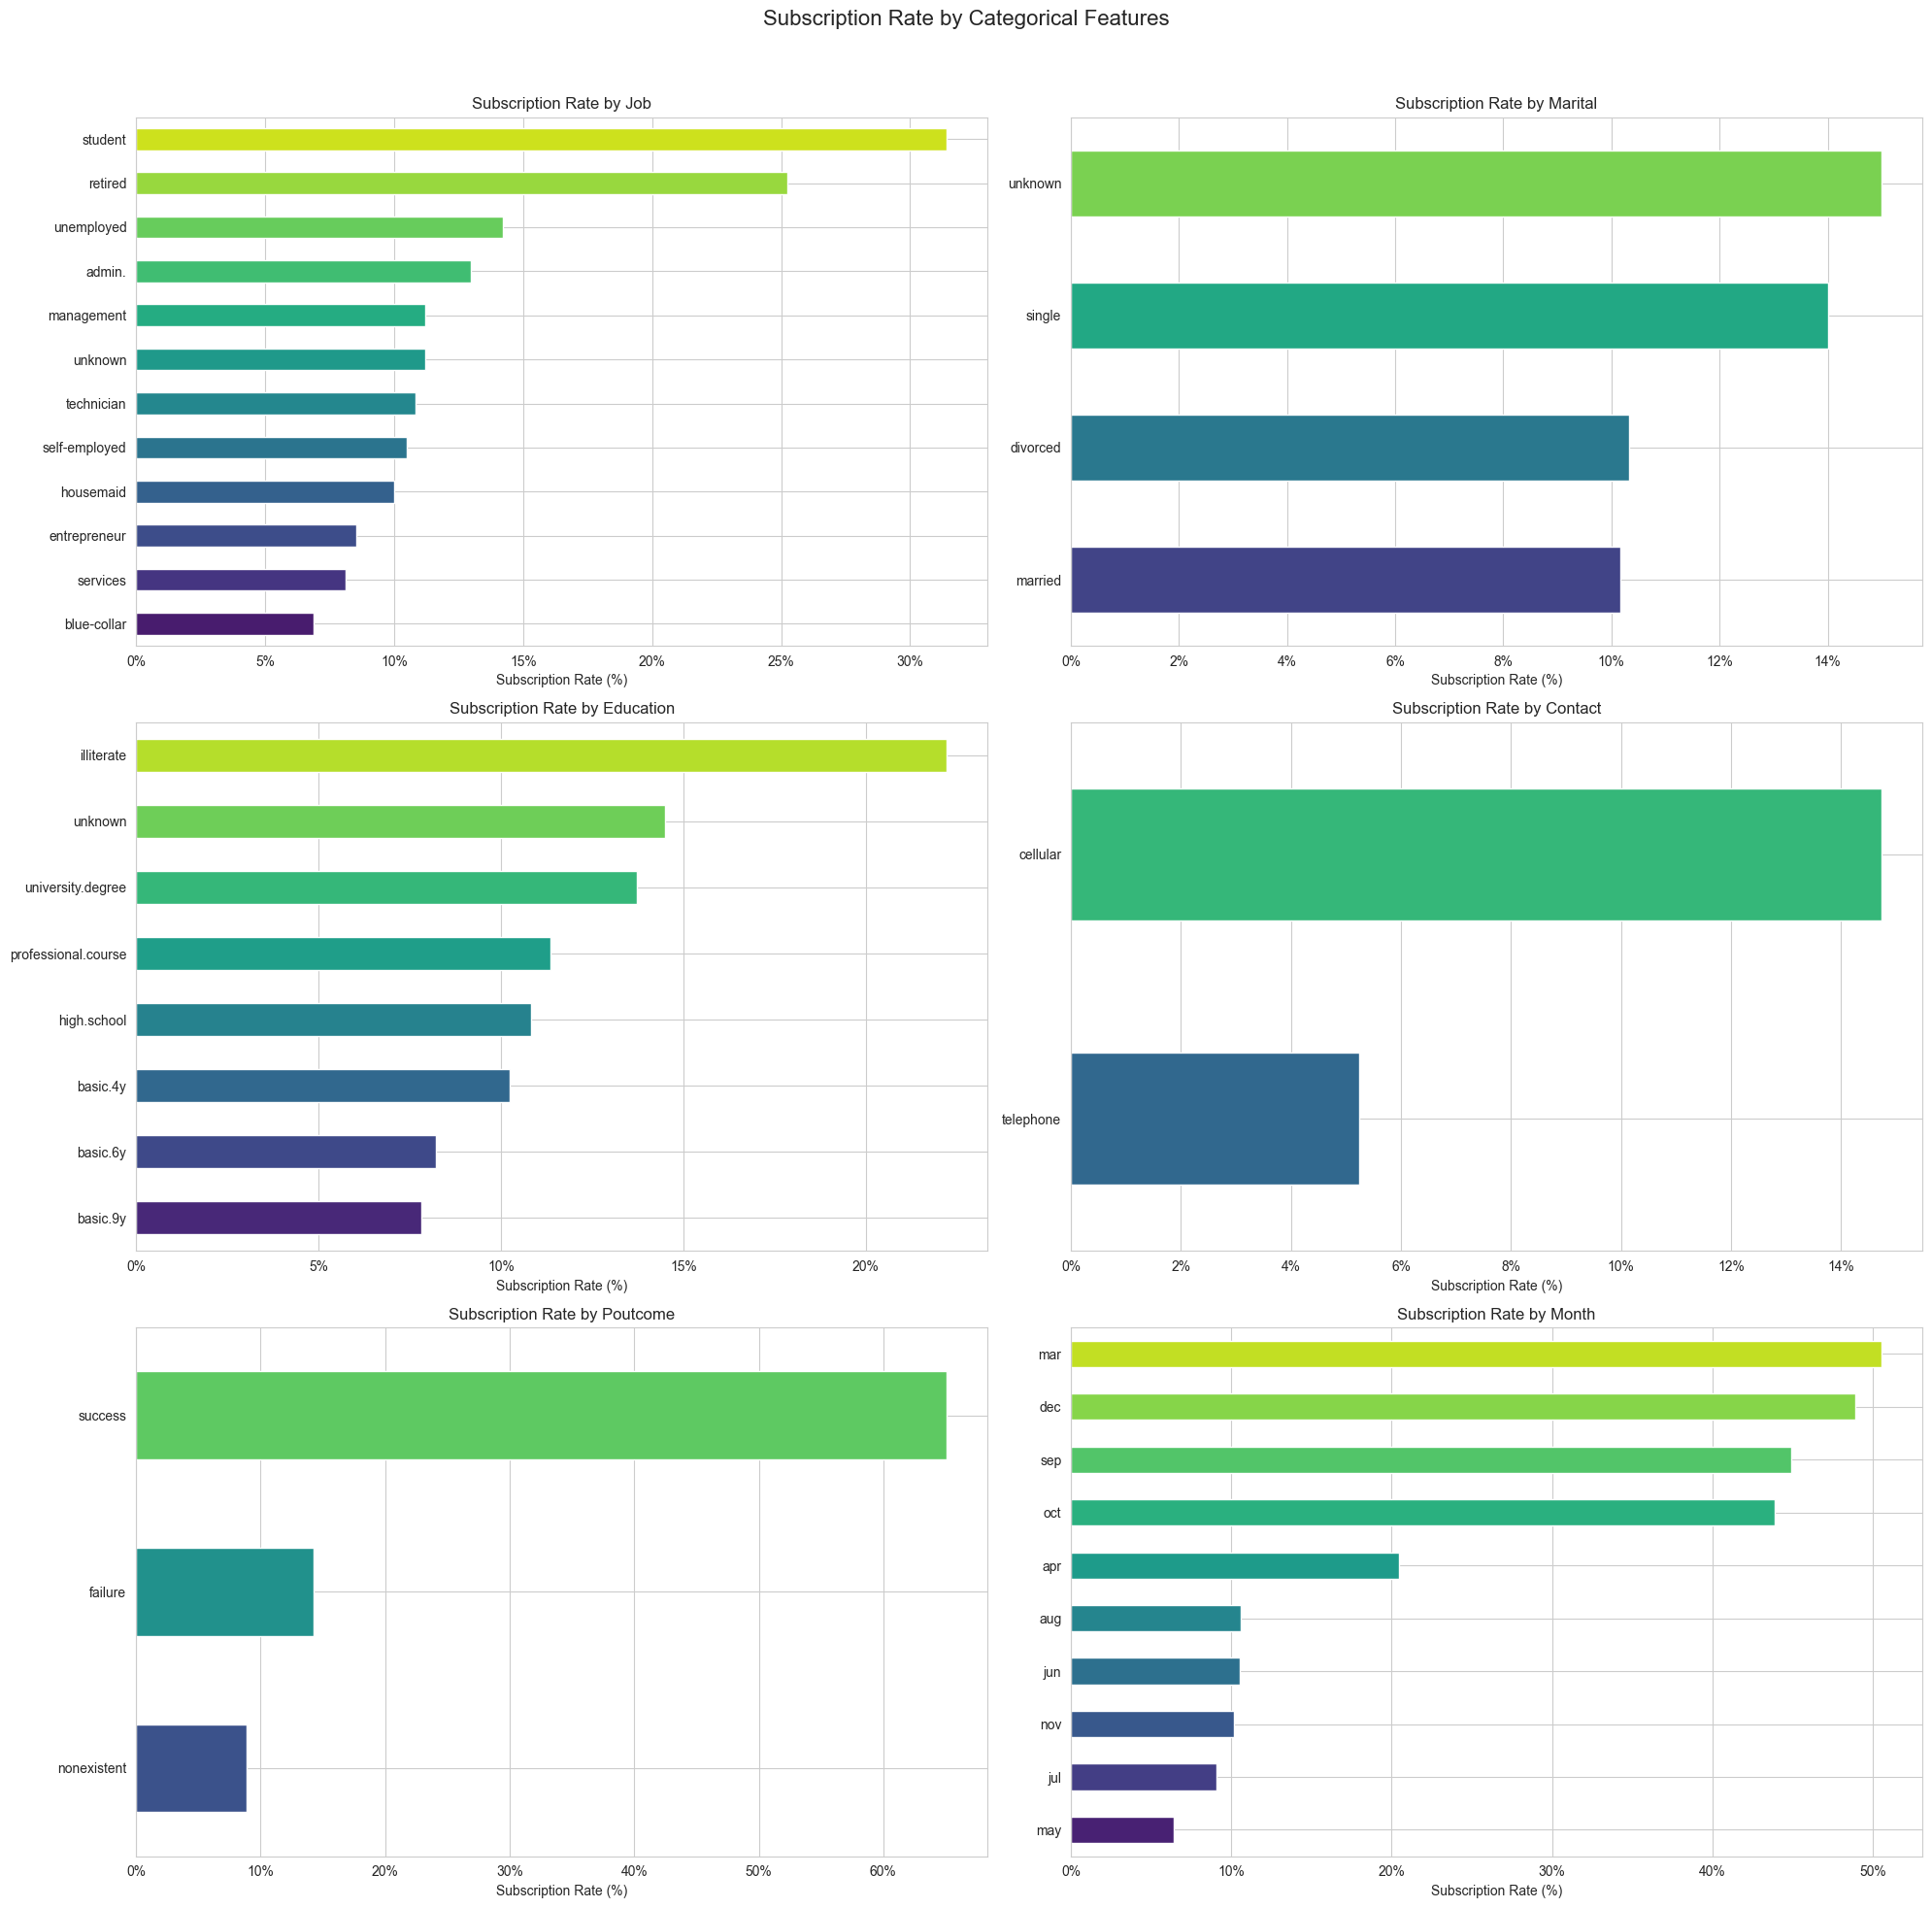

In [335]:
# We will reuse the df_rate DataFrame with the 'y_numeric' column
cat_features = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']

fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.flatten()
fig.suptitle('Subscription Rate by Categorical Features', fontsize=16)

for i, col in enumerate(cat_features):
    # Calculate subscription rate
    rate = df_rate.groupby(col)['y_numeric'].mean().sort_values(ascending=True)

    # Plot
    rate.plot(kind='barh', ax=axes[i], color=sns.color_palette('viridis', len(rate)))
    axes[i].set_title(f'Subscription Rate by {col.capitalize()}')
    axes[i].set_xlabel('Subscription Rate (%)')
    axes[i].set_ylabel('')
    # Format x-axis as percentage
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Correlation Analysis Summary
#### Correlation Matrix of Numerical Features
The correlation matrix reveals strong relationships between several of the socio-economic indicator variables.
- High Multicollinearity: There are very strong positive correlations between `emp.var.rate, euribor3m, and nr.employed`, with correlation coefficients ranging from 0.91 to 0.97. This indicates that these features measure similar underlying economic conditions. For certain models, like logistic regression, this multicollinearity can be problematic, and we may consider removing some of these redundant features during the feature selection phase.
- Other Correlations: A moderate negative correlation exists between previous (number of contacts before this campaign) and pdays (days since last contact), with a coefficient of -0.59. This makes sense, as clients with more previous contacts are likely to have been contacted more recently.

#### Subscription Rate Analysis
Calculating the exact subscription rates confirms the visual insights from the earlier plots and provides precise metrics.

- By Job: Students (31.4%) and retired clients (25.2%) have the highest likelihood of subscribing to a term deposit. In contrast, blue-collar workers (6.9%) have the lowest subscription rate. This reinforces that targeting specific client professions could significantly increase campaign efficiency.
- By Previous Outcome: The outcome of a previous campaign is an extremely powerful indicator. Clients with a "success" in a prior campaign have a 65.1% subscription rate, which is dramatically higher than for clients with no previous contact ("nonexistent" at 8.8%) or a previous "failure" (14.2%).






## 1.6 Conclusion of Exploratory Data Analysis (EDA)
This EDA has identified key patterns and characteristics within the dataset that will be needed during our modeling strategy.

1. Strong Predictors Identified: Several features show a strong relationship with the client's decision to subscribe. The most influential appear to be the outcome of the previous campaign (`poutcome`), the month of contact, the contact method (`contact`), and the socio-economic indicators (`emp.var.rate, euribor3m, etc.`). Client job type also shows significant variance in subscription rates.

2. Data Leakage for Model: The duration feature is highly correlated with the outcome but must be excluded from the predictive model, since this information is not available before an actual call is made.

3. Data Quality & Preprocessing Needs:

- "Unknown" Values: Several key categorical features contain "unknown" entries, which will need to be handled, either by treating them as a distinct category, imputing them with different categories or replacing as NAN values.
- Class Imbalance: The target variable 'y' is highly imbalanced, with a large majority of non-subscribers. This must be addressed during the modeling phase to prevent model bias.
- Multicollinearity: The high correlation among socio-economic features suggests that feature selection is an important step especially for Logistic Regression Models.
    -  When features are highly correlated, it becomes difficult to distinguish their individual effects on the target variable.
    -  Multicollinearity can be problematic for certain models, such as logistic regression
    -  Highly correlated features provide redundant information, thus by removing them we can reduce model complexity

# 2. Data Preprocessing
Following the EDA, the next phase is Data Preprocessing. While the EDA serves as a diagnostic investigation, providing a deep understanding of the dataset's structure, underlying patterns, and most importantly, its limitations and potential issues.

The analysis revealed mentioned challenges that must be addressed before modeling such as:
- the presence of "unknown" values in categorical features and the encoding of categorical features
- significant class imbalance in the target variable
- high multicollinearity among the socio-economic indicators
- data leakage risk from the duration feature

In [336]:
df = bank_additional_full_df.copy()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 2.1 Address Data Leakage by Removing 'duration' column

In [337]:
# Remove the 'duration' column to prevent data leakage
df.drop('duration', axis=1, inplace=True)

## 2.2 Encode the Target Variable 'y'
Machine learning models require numerical inputs, so our first and simplest step is to convert the `y` column's values from "yes" and "no" to a binary format (1 and 0).

In [338]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


> **Why do we need to encode categoriacal columns?** Machine learning algorithms are based on mathematical equations and can only process numerical data. They cannot understand text labels like 'yes' or 'no' directly. In this case we the `y` category with 1 and 0 since it has only 2 options. **But what about features that have more categories?**

## 2.3 Encoding categoriacal features with more than 2 categories using [One-Hot-Encoding](https://www.datacamp.com/de/tutorial/one-hot-encoding-python-tutorial)
The principle of one-hot encoding works exactly the same way, whether a feature has two categories or many more. It simply expands to create a new binary column for every unique category.

So let's encode all categorical columns.

In [339]:
# 1. Identify all categorical columns that need encoding
# These are the columns with string values (object dtype)
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [340]:
# 2. Apply one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=False,dtype=int)

# 3. Display the results
print(f"Original shape of the DataFrame: {df.shape}")
print(f"Shape after one-hot encoding: {df_encoded.shape}\n")

Original shape of the DataFrame: (41188, 20)
Shape after one-hot encoding: (41188, 63)



In [341]:
df_encoded.head(5)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


## 2.4 Separating Feature and Target Variable

In [342]:
# Separate the features (X) from the target variable (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (41188, 62)
Shape of target (y): (41188,)


## 2.5 Split Data into Training and Testing Sets

In [343]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
# 'stratify=y' ensures that the proportion of subscribers is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape} samples")
print(f"Testing set size: {X_test.shape} samples")

Training set size: (32950, 62) samples
Testing set size: (8238, 62) samples


## 2.6 Scaling Data
Since models like Logistc Regression need scaled values, we will create a scaled version of the training data.

In [344]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler ONLY on the training data
# The scaler learns the parameters (mean, std) from X_train.
scaler.fit(X_train)

# 3. Use the fitted scaler to transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Convert scaled arrays back to DataFrames to preserve feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


print("Data has been successfully scaled.")
print("The shape of the scaled training data is:", X_train_scaled.shape)

Data has been successfully scaled.
The shape of the scaled training data is: (32950, 62)


# 3. Comparing Models before performing Feature Engineering
In this section we will create and compare the first baseline models using all preprocessed features, except for the `duration` feature to prevent data leakage.

## 3.1 First Baseline LogisticRegression Model

In [345]:
from sklearn.linear_model import LogisticRegression
# 1. Initialize the Logistic Regression model
# We'll set max_iter to a higher value to ensure the model's algorithm converges.
log_reg_baseline = LogisticRegression(random_state=42, max_iter=500)

In [346]:
# 2. Train the model on the (unscaled, imbalanced) training data
print("Training the baseline logistic regression model...")
log_reg_baseline.fit(X_train_scaled, y_train)
print("Model training complete.")

Training the baseline logistic regression model...
Model training complete.


/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountere

## 3. 2 Model Evalutation
Since this task is a binary classification problem where:
- Target Variable: y
- Positive Outcome ('yes'): The client subscribed to the term deposit.
- Negative Outcome ('no'): The client did not subscribe to the term deposit.

Therefore the folling Metrics are imporant to consider when trying to improve the selected model:

- Precision, Recall, and F1-Score will help us understand the trade-offs in your model's predictions (e.g., "Of all the clients we predicted would subscribe, how many actually did?").
- ROC AUC will give you a comprehensive measure of how well your model can distinguish between clients who will subscribe and those who will not, across all possible decision thresholds.

For that we will define reusable functions that we can apply to differen models.

In [369]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Import necessary dummy data and models for a runnable example
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize global containers for results and ROC curve data.
model_results_df = None
roc_curve_data = {} # dictionary to store ROC data for each model

def evaluate_model(model, X_test_scaled, y_test, model_name='Model'):
    """
    Generates a comprehensive evaluation for a classification model, stores key
    metrics in a global DataFrame, and stores ROC curve data in a global dictionary.

    Args:
        model: The trained scikit-learn classification model.
        X_test_scaled: The scaled test features.
        y_test: The true labels for the test set.
        model_name (str): The name of the model for titles and labels.
    """
    global model_results_df, roc_curve_data # Include the new global variable

    print(f"========== EVALUATING: {model_name} ==========\n")

    # --- 1. Generate Predictions ---
    y_pred = model.predict(X_test_scaled)
    y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]

    # --- 2. Confusion Matrix ---
    print(f"--- Confusion Matrix for {model_name} ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # --- 3. Classification Report & F1-Score ---
    print(f"\n--- Classification Report for {model_name} ---")
    report = classification_report(y_test, y_pred, target_names=['No (Class 0)', 'Yes (Class 1)'])
    print(report)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    f1_positive_class = report_dict['1']['f1-score'] if '1' in report_dict else report_dict['Yes']['f1-score']


    # --- 4. Detailed Metrics & ROC AUC ---
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    roc_auc = roc_auc_score(y_test, y_pred_probs)

    # --- 5. Store scalar results in the global DataFrame ---
    metrics = {
        'Model': model_name, 'Accuracy': accuracy, 'Precision': precision,
        'Recall (Sensitivity)': recall, 'Specificity': specificity,
        'F1-Score (Class 1)': f1_positive_class, 'ROC AUC': roc_auc
    }
    new_results = pd.DataFrame([metrics])

    if model_results_df is None:
        model_results_df = new_results
    elif model_name not in model_results_df['Model'].values:
        model_results_df = pd.concat([model_results_df, new_results], ignore_index=True)

    # --- 6. Store ROC Curve data (NEW) ---
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    if model_name not in roc_curve_data:
        roc_curve_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

    # Display the updated comparison table
    print("\n--- Model Comparison Table ---")
    display(model_results_df)
    print("\n" + "="*50 + "\n")


def plot_all_roc_curves(roc_data):
    """
    Plots the ROC curves for all evaluated models on a single graph.

    Args:
        roc_data (dict): A dictionary containing the FPR, TPR, and ROC AUC
                         score for each model.
    """
    print("Roc Curve Plotting for All Models:")
    plt.figure(figsize=(10, 8))
    for model_name, data in roc_data.items():
        plt.plot(data['fpr'], data['tpr'], lw=2,
                 label=f"{model_name} (AUC = {data['roc_auc']:.2f})")

    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='No-Skill Line (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

========== EVALUATING: Baseline Logistic Regression ==========

--- Confusion Matrix for Baseline Logistic Regression ---


/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


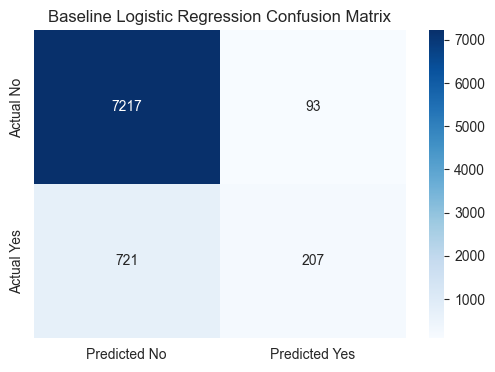


--- Classification Report for Baseline Logistic Regression ---
               precision    recall  f1-score   support

 No (Class 0)       0.91      0.99      0.95      7310
Yes (Class 1)       0.69      0.22      0.34       928

     accuracy                           0.90      8238
    macro avg       0.80      0.61      0.64      8238
 weighted avg       0.88      0.90      0.88      8238


--- Model Comparison Table ---


,Model,Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Score (Class 1),ROC AUC
0,Baseline Logistic Regression,0.90119,0.69,0.22306,0.987278,0.337134,0.800964




Roc Curve Plotting for All Models:


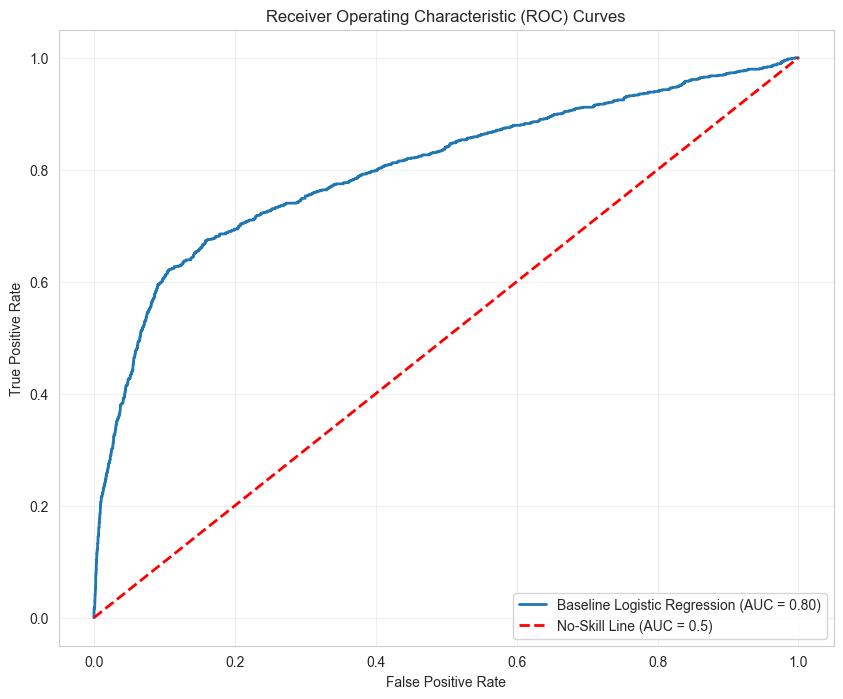

In [370]:
evaluate_model(log_reg_baseline, X_test_scaled, y_test, model_name='Baseline Logistic Regression')
plot_all_roc_curves(roc_curve_data)

### 3.2.1 Results of Logistic Regression Model
The baseline Logistic Regression model demonstrates a high overall accuracy of approximately 90%. However, this metric is misleading as it masks a critical weakness. The model's recall for the positive Yes (Class 1) is only 0.22, meaning it successfully identifies just 22% of all actual subscribers while failing to find the other 78%.

This poor recall is a direct result of the significant class [imbalance in the dataset](https://rihab-feki.medium.com/imbalanced-data-best-practices-f3b6d0999f38), where the model achieves high accuracy by defaulting to the majority "No" class. To create a model that provides real business value, this imbalance must be addressed later on to improve its ability to identify potential customers. For now we will keep testing different models to see the first overall performance.

## 3.2 Random Forest Classifier

--- Training Random Forest Model---
========== EVALUATING: Random Forest Model ==========

--- Confusion Matrix for Random Forest Model ---


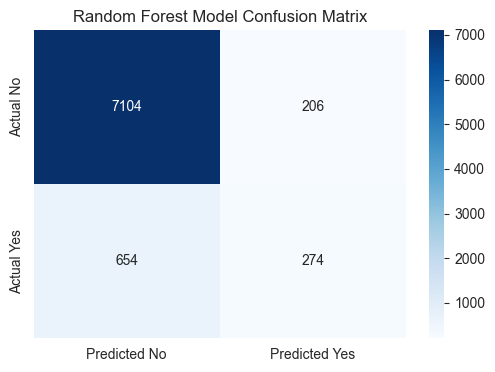


--- Classification Report for Random Forest Model ---
               precision    recall  f1-score   support

 No (Class 0)       0.92      0.97      0.94      7310
Yes (Class 1)       0.57      0.30      0.39       928

     accuracy                           0.90      8238
    macro avg       0.74      0.63      0.67      8238
 weighted avg       0.88      0.90      0.88      8238


--- Model Comparison Table ---


,Model,Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Score (Class 1),ROC AUC
0,Baseline Logistic Regression,0.901190,0.690000,0.223060,0.987278,0.337134,0.800964
1,Random Forest Model,0.895606,0.570833,0.295259,0.971819,0.389205,0.783062




Roc Curve Plotting for All Models:


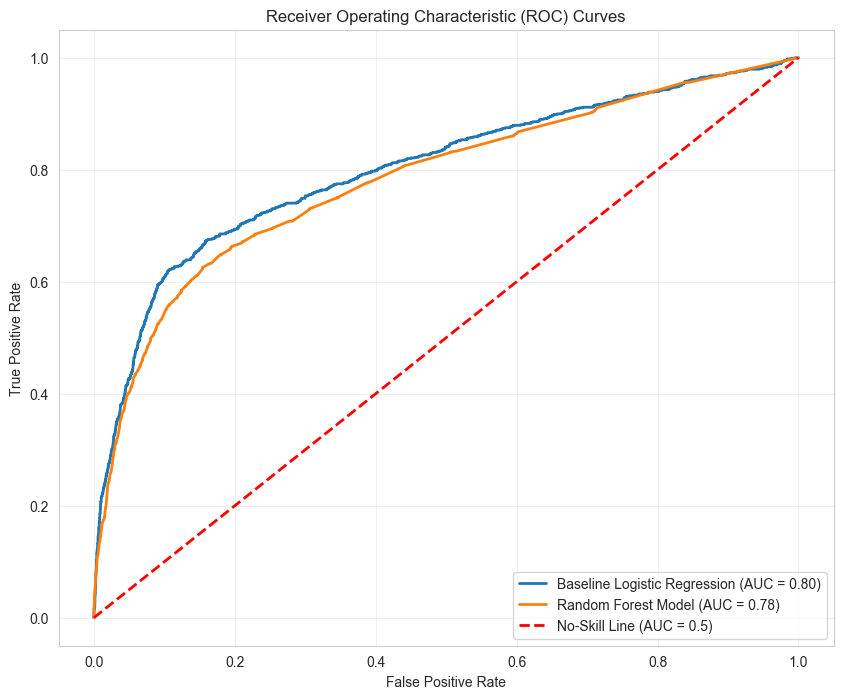

In [372]:
from sklearn.ensemble import RandomForestClassifier

print("--- Training Random Forest Model---")
# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
evaluate_model(rf_model, X_test, y_test, model_name='Random Forest Model')
plot_all_roc_curves(roc_curve_data)

### 3.2.1 Results for Random Forest Classifier
The Random Forest model, while maintaining a high overall accuracy of approximately 89%, shows a significant and positive shift in performance compared to the logistic regression baseline, particularly regarding the key business metric of recall.

The Recall (Sensitivity) for Yes (Class 1) has increased to 0.30. This indicates that the model now correctly identifies 30% of all potential subscribers, a notable improvement over the previous model. However, this comes at the cost of a lower precision, which has dropped to 0.57, signifying that the model makes more incorrect positive predictions. The overall ability of the model to distinguish between classes, measured by the ROC AUC score, is 0.78.

In conclusion, the Random Forest architecture, even without explicit handling of the class imbalance and tuning, naturally provides a better trade-off for this marketing problem by finding more potential customers than the baseline model.

## 3.3 Support Vector Classifier (SVC)

--- Training SVC ---
========== EVALUATING: SVC Model ==========

--- Confusion Matrix for SVC Model ---


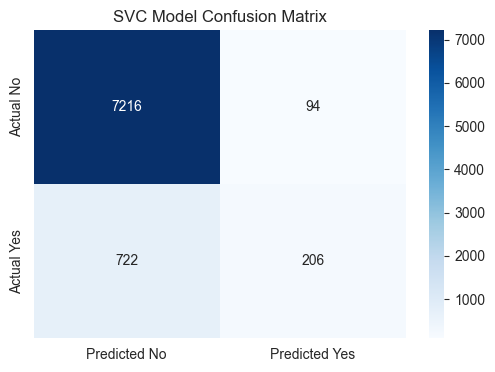


--- Classification Report for SVC Model ---
               precision    recall  f1-score   support

 No (Class 0)       0.91      0.99      0.95      7310
Yes (Class 1)       0.69      0.22      0.34       928

     accuracy                           0.90      8238
    macro avg       0.80      0.60      0.64      8238
 weighted avg       0.88      0.90      0.88      8238



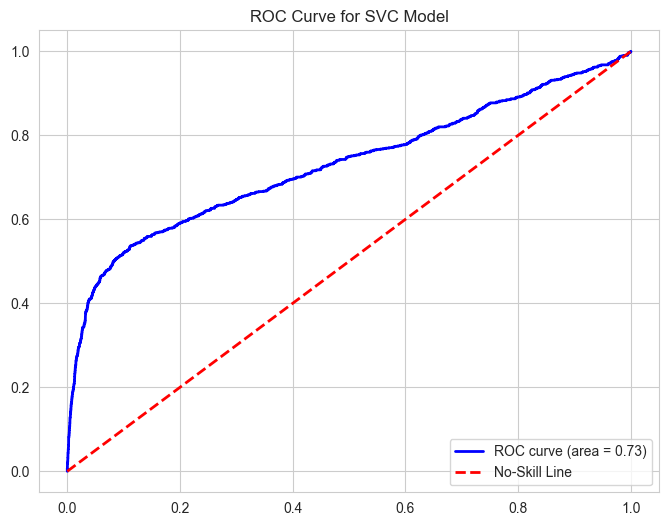


--- Model Comparison Table ---


,Model,Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Score (Class 1),ROC AUC
0,Baseline Logistic Regression,0.901190,0.690000,0.223060,0.987278,0.337134,0.800964
1,Random Forest Model,0.895606,0.570833,0.295259,0.971819,0.389205,0.783063
2,SVC Model,0.900947,0.686667,0.221983,0.987141,0.335505,0.729450


In [350]:
from sklearn.svm import SVC

# --- Model 7: SVC on Scaled, Imbalanced Data ---
print("--- Training SVC ---")
# probability=True is required to calculate ROC AUC score later.
svc_model = SVC(random_state=42, probability=True)
svc_model.fit(X_train_scaled, y_train)
evaluate_model(svc_model, X_test_scaled, y_test, model_name='SVC Model')

### 3.4.4 Results for Support Vector Classifier (SVC)
The Support Vector Classifier (SVC), when trained on the imbalanced dataset, achieved a high accuracy of 90.09% but struggled with the key business objective of identifying positive cases.

The model's Recall (Sensitivity) was only 0.22, which is a negligible improvement over the baseline Logistic Regression and is significantly outperformed by the Random Forest and Gradient Boosting models. Furthermore, its overall ability to distinguish between classes was the weakest among the non-linear models, with a ROC AUC score of 0.73.

While the SVC maintained a relatively high precision of 0.69, its failure to improve upon the baseline's poor recall suggests that, in its default configuration, it is less suited for this specific imbalanced classification problem than the tree-based ensemble methods.

## 3.4 Gradient Boosting Machines
[Gradient Boosting](https://www.geeksforgeeks.org/machine-learning/ml-gradient-boosting/) is a ensemble learning method used for classification and regression tasks. It is a boosting algorithm which combine multiple weak learner to create a strong predictive model. It works by sequentially training models where each new model tries to correct the errors made by its predecessor.

### 3.4.1 Light Gradient Boosting Machine (LGBM)

--- Training LightGBM  ---
[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898
========== EVALUATING: LightGBM Model ==========

--- Confusion Matrix for LightGBM Model ---


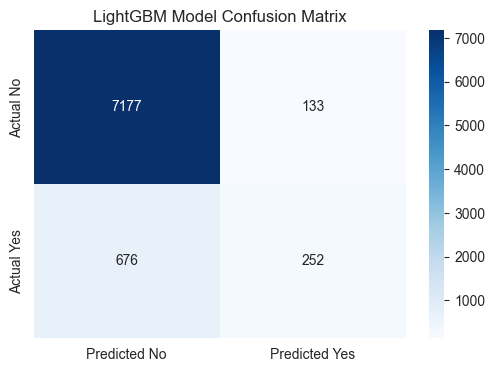


--- Classification Report for LightGBM Model ---
               precision    recall  f1-score   support

 No (Class 0)       0.91      0.98      0.95      7310
Yes (Class 1)       0.65      0.27      0.38       928

     accuracy                           0.90      8238
    macro avg       0.78      0.63      0.67      8238
 weighted avg       0.88      0.90      0.88      8238


--- Model Comparison Table ---


,Model,Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Score (Class 1),ROC AUC
0,Baseline Logistic Regression,0.901190,0.690000,0.223060,0.987278,0.337134,0.800964
1,Random Forest Model,0.895606,0.570833,0.295259,0.971819,0.389205,0.783062
2,LightGBM Model,0.901797,0.654545,0.271552,0.981806,0.383854,0.811414




Roc Curve Plotting for All Models:


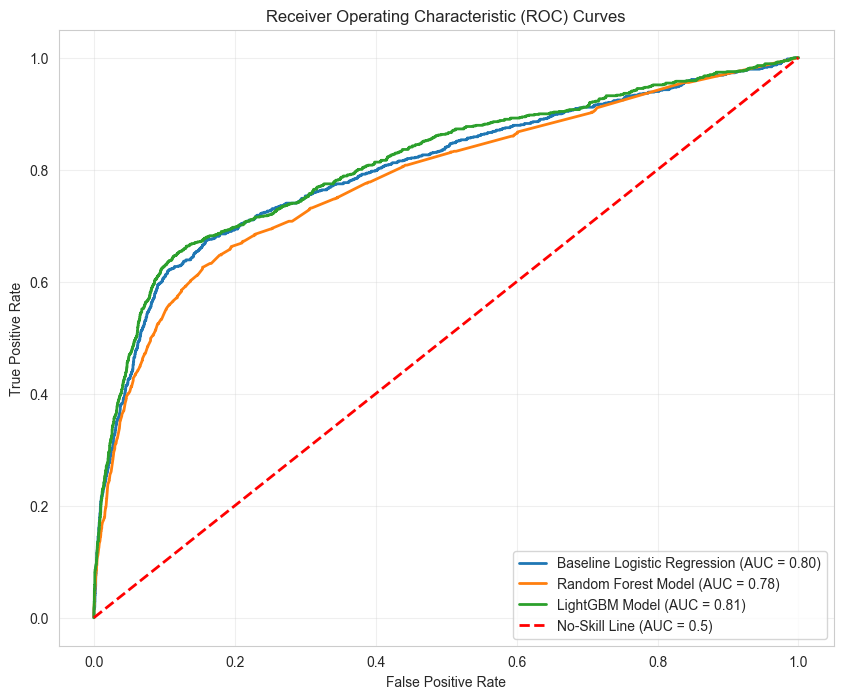

In [374]:
from lightgbm import LGBMClassifier

# --- Model 5: LightGBM on Scaled, Imbalanced Data ---
print("--- Training LightGBM  ---")
# Initialize the model
lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1)

# Train the model
lgbm_model.fit(X_train, y_train)

# Evaluate the model
evaluate_model(lgbm_model, X_test, y_test, model_name='LightGBM Model')
plot_all_roc_curves(roc_curve_data)

## 3.4.2 Extreme Gradient Boosting Machine (XGBoost)

--- Training XGBoost ---
========== EVALUATING: XGBoost Model ==========

--- Confusion Matrix for XGBoost Model ---


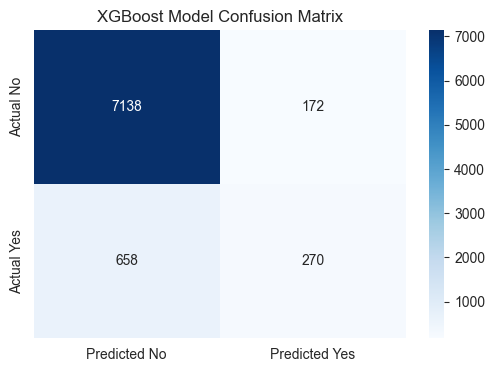


--- Classification Report for XGBoost Model ---
               precision    recall  f1-score   support

 No (Class 0)       0.92      0.98      0.95      7310
Yes (Class 1)       0.61      0.29      0.39       928

     accuracy                           0.90      8238
    macro avg       0.76      0.63      0.67      8238
 weighted avg       0.88      0.90      0.88      8238


--- Model Comparison Table ---


,Model,Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Score (Class 1),ROC AUC
0,Baseline Logistic Regression,0.901190,0.690000,0.223060,0.987278,0.337134,0.800964
1,Random Forest Model,0.895606,0.570833,0.295259,0.971819,0.389205,0.783062
2,LightGBM Model,0.901797,0.654545,0.271552,0.981806,0.383854,0.811414
3,XGBoost Model,0.899247,0.610860,0.290948,0.976471,0.394161,0.797380




Roc Curve Plotting for All Models:


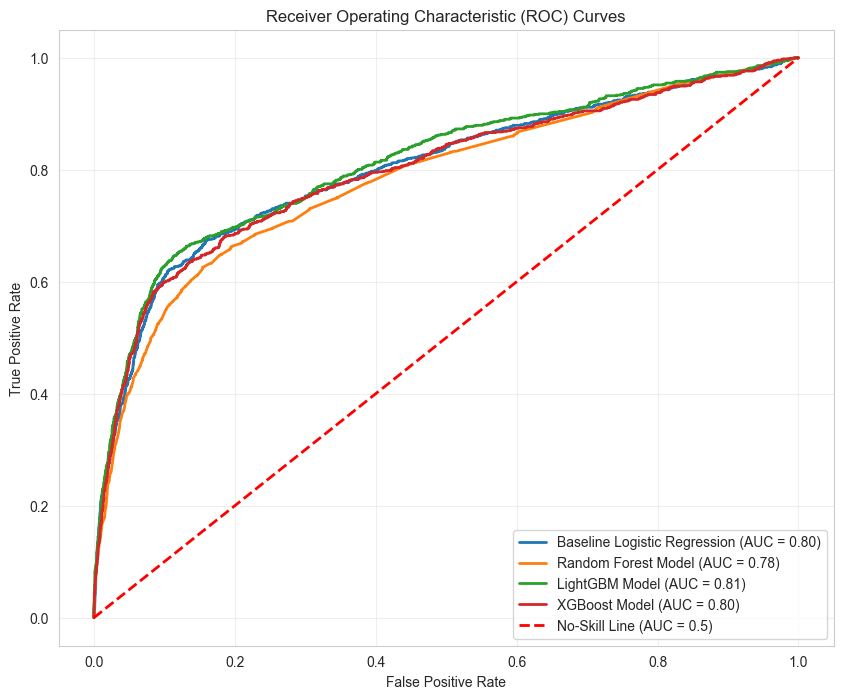

In [375]:
from xgboost import XGBClassifier

# --- Model 9: XGBoost on Scaled, Imbalanced Data ---
print("--- Training XGBoost ---")
# use_label_encoder=False and eval_metric are set to avoid warnings.
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
evaluate_model(xgb_model, X_test_scaled, y_test, model_name='XGBoost Model')
plot_all_roc_curves(roc_curve_data)

### 3.4.3 Results for Gradient Boosting Machines
The gradient boosting models, LightGBM and XGBoost, both demonstrated strong performance on the imbalanced dataset, showing a significant improvement over the baseline in key areas.

The LightGBM model achieved a high overall discriminative power, with a ROC AUC score of 0.81. While its accuracy was a high 90.18%, its Recall (Sensitivity) for the positive class was 0.27. The XGBoost model performed similarly, with a slightly lower ROC AUC of 0.80, but achieved a higher Recall of 0.29.

In conclusion, both gradient boosting models are powerful candidates. LightGBM shows the most potential for overall class separation, while XGBoost provides a slightly better default performance on the crucial recall metric. Evaluating these models on a balanced dataset is a critical next step.

## 3.5 Deep Learning Architechture (MultilayerPerceptron Classifier)

--- Training Model 11: MLP on Imbalanced Data ---


/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


========== EVALUATING: MLP Model ==========

--- Confusion Matrix for MLP Model ---


/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tomyle/Pycharm/xai_capstone/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


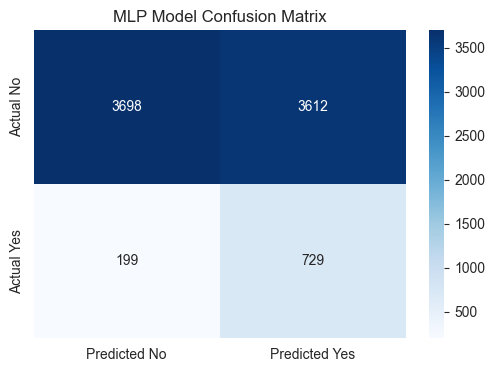


--- Classification Report for MLP Model ---
               precision    recall  f1-score   support

 No (Class 0)       0.95      0.51      0.66      7310
Yes (Class 1)       0.17      0.79      0.28       928

     accuracy                           0.54      8238
    macro avg       0.56      0.65      0.47      8238
 weighted avg       0.86      0.54      0.62      8238


--- Model Comparison Table ---


,Model,Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Score (Class 1),ROC AUC
0,Baseline Logistic Regression,0.901190,0.690000,0.223060,0.987278,0.337134,0.800964
1,Random Forest Model,0.895606,0.570833,0.295259,0.971819,0.389205,0.783062
2,LightGBM Model,0.901797,0.654545,0.271552,0.981806,0.383854,0.811414
3,XGBoost Model,0.899247,0.610860,0.290948,0.976471,0.394161,0.797380
4,MLP Model,0.537388,0.167934,0.785560,0.505882,0.276713,0.746272




Roc Curve Plotting for All Models:


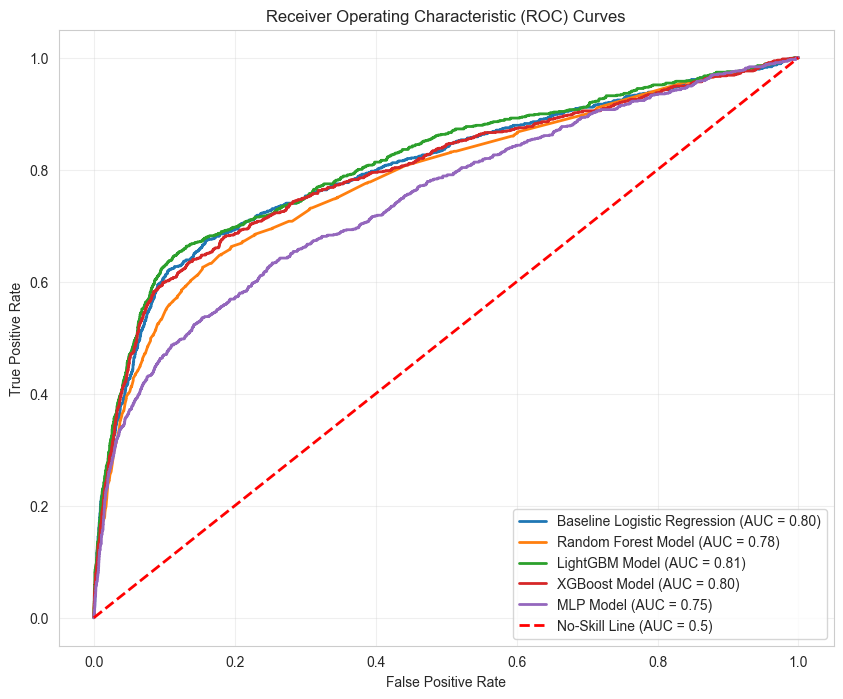

In [376]:
from sklearn.neural_network import MLPClassifier

# --- Model 11: MLP on Scaled, Imbalanced Data ---
print("--- Training Model 11: MLP on Imbalanced Data ---")
# We set a higher max_iter to ensure the model has time to converge.
mlp_model = MLPClassifier(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)
evaluate_model(mlp_model, X_test_scaled, y_test, model_name='MLP Model')
plot_all_roc_curves(roc_curve_data)


### 3.5.1 Results of MLP Model
The Multi-layer Perceptron (MLP) model, trained on the imbalanced dataset, demonstrates a unique and aggressive strategy, producing different results from all previously tested models.

The model achieved a very high Recall (Sensitivity) of 0.79, successfully identifying almost 79% of all potential subscribers. This is the best performance on this key metric.

However, this high recall comes at a significant cost to precision and overall accuracy. The model's Precision for the positive class is extremely low at 0.17, and its overall Accuracy is only 58%. This indicates that while the model finds most of the actual subscribers, it makes a very large number of false-positive predictions. Furthermore, its overall ability to distinguish between classes is weaker than the boosting models, with a ROC AUC score of 0.74.

In conclusion, the default MLP model has learned a high-recall, low-precision strategy. While the high recall is desirable, the extremely low precision would make it inefficient for a real-world marketing campaign.

## 3.6 Overall Summary of Initial Model Testing
This initial modeling phase aimed to establish performance benchmarks for a variety of classifier models on the preprocessed, but still imbalanced, dataset.

The results consistently show that most models (Logistic Regression, Random Forest, LightGBM, SVC) achieve a high but misleading accuracy of around 90%. This is primarily a reflection of the model correctly predicting the majority "No" class due to the significant class imbalance, which was a key issue identified in the EDA section.

A deeper analysis reveals critical differences in model behavior:

- Recall (Sensitivity): The primary business metric of finding potential customers saw varied performance. The linear models (Logistic Regression and SVC) performed poorly, with a recall of only 0.22. The tree-based ensembles offered a moderate improvement, with Random Forest and XGBoost achieving the best recall among them at ~0.30. The MLP model adopted a unique high-recall strategy (0.79), but at the cost of extremely low precision and accuracy, rendering it impractical in its current state.
- Overall Discriminative Power (ROC AUC): The Gradient Boosting models and Logistic Regression proved to be the most effective at distinguishing between the two classes. The LightGBM model achieved the highest ROC AUC score of 0.81, indicating it has the strongest underlying potential.

In conclusion, no single model is effective out-of-the-box with not tuning on the imbalanced data. The tree-based ensembles, particularly LightGBM and XGBoost, appear to be the most promising candidates due to their superior ROC AUC scores and Recall-Accuracy Tradeoff. The consistent failure to achieve acceptable recall across most models confirms that addressing the class imbalance is the most important next step.

> **With these insights we will select the Gradient Boosting Machines as our main model, which we will use for the follwing next chapters**

# 4. Improving Model selected Model

## 4.1 Adress Imbalance Issue
As show in the previous chapter training a classification model on an imbalanced dataset might result in a high accuracy, only to find out that 90% of the data belongs to one class. Therefore the accuracy is masked by the imbalanced ratio of the classes. In general imbalanced data refers to a dataset where the traget class distribution represents unequivalant proportions.
> The question is now: How do we tackle this problem? Since we want to predict the Yes classes with high certainty (Recall Metric) we need to adress this issue.

## 4.2 Feature Engineering

## 4.3 Hyperparameter Tuning

# 5. Explainable AI (XAI)

##  5.1 Global Explainability


##  5.2 Local Explainablity